In [1]:
require(data.table)
require(ggplot2)
require(TSrepr)
require(TSdist)
require(dtw)
require(Rcpp)

Loading required package: data.table

Warning message:
"package 'data.table' was built under R version 4.0.5"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.0.5"
Loading required package: TSrepr

Warning message:
"package 'TSrepr' was built under R version 4.0.5"
Loading required package: TSdist

Warning message:
"package 'TSdist' was built under R version 4.0.5"
Loading required package: proxy

Warning message:
"package 'proxy' was built under R version 4.0.5"

Attaching package: 'proxy'


The following objects are masked from 'package:stats':

    as.dist, dist


The following object is masked from 'package:base':

    as.matrix


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loaded TSdist v3.7. See ?TSdist for help, citation("TSdist") for use in publication.


Loading required package: dtw

Warning message:
"package 'dtw' was built under R version 4.0.5"
Loaded dtw v1.22-3. See ?

In [2]:
# assuming you have the data folder in your working directory in the following format:
# 'working_directory/ClassificationData/dataset_name/'
current_folder=getwd()
dataset='Plane'
main_path=sprintf('%s/ClassificationData/%s/%s',current_folder,dataset,dataset)

dist_path=sprintf('%s/ClassificationData/%s/distances/%s',current_folder,dataset,dataset)

train_data_path=sprintf('%s_TRAIN.txt',main_path)
traindata=as.matrix(fread(train_data_path))
traindata_rep = fread(train_data_path) ## for representations, class data needs to be hold.

test_data_path=sprintf('%s_TEST.txt',main_path)
testdata=as.matrix(fread(test_data_path))
testdata_rep = fread(test_data_path)
#first column is the class variable
trainclass=traindata[,1] # takes -1 and 1
testclass=testdata[,1] # takes -1 and 1

#drop first column
traindata=traindata[,2:ncol(traindata)]
testdata=testdata[,2:ncol(testdata)]

# instance characteristics
tlength=ncol(traindata)
n_series_train=nrow(traindata)
n_series_test=nrow(testdata)

In [3]:
##### K = 1  
## raw + euclidian
## raw + DTW
## raw + LCSS 
## raw + ERP 
##### K = 3 
## raw + euclidian 
## raw + DTW 
## raw + LCSS 
## raw + ERP 
##### K = 5
## raw + euclidian
## raw + DTW
## raw + LCSS 
## raw + ERP

### Representations

Prepare data as long format for representations 

In [4]:
setnames(traindata_rep,'V1','class')

traindata_rep <- traindata_rep[order(class)]

head(traindata_rep)

traindata_rep[,class:=as.character(class)]
traindata_rep[,id:=1:.N]
long_train=melt(traindata_rep,id.vars=c('id','class'))

long_train[,time:=as.numeric(gsub("\\D", "", variable))-1]

long_train=long_train[,list(id,class,time,value)]
long_train=long_train[order(id,time)]

long_train

class,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2.483940,2.276286,2.067516,1.921893,1.718775,1.508428,1.300675,1.090286,0.8827328,...,0.7133945,0.9158603,1.120450,1.326346,1.532210,1.739919,1.945732,2.153986,2.361228,2.483939
1,2.483831,2.268816,2.062630,1.871328,1.661073,1.460832,1.259224,1.064227,0.8668865,...,0.9260316,1.1178591,1.303932,1.490492,1.677479,1.864847,2.053402,2.235380,2.417056,2.488396
1,2.484363,2.285890,2.092948,1.901565,1.711442,1.520270,1.328444,1.139313,0.9493701,...,0.8769780,1.0625615,1.248433,1.434596,1.615563,1.798410,1.988494,2.172949,2.330954,2.488020
1,2.538888,2.344460,2.129988,1.920682,1.701969,1.493056,1.284287,1.080085,0.8715411,...,0.8895892,1.0853721,1.281527,1.478005,1.668028,1.858608,2.056066,2.247423,2.427091,2.544562
1,2.449847,2.322454,2.133778,1.943460,1.753229,1.563099,1.375247,1.187792,0.9982683,...,0.7648156,0.9558404,1.146891,1.338098,1.529512,1.721917,1.913810,2.106671,2.299936,2.448541
1,2.439705,2.248813,2.058446,1.868393,1.678090,1.489388,1.299571,1.111022,0.9205041,...,0.8324658,1.0206032,1.210681,1.399287,1.587433,1.776039,1.965455,2.156040,2.306447,2.439931


id,class,time,value
<int>,<chr>,<dbl>,<dbl>
1,1,1,2.48393970
1,1,2,2.27628650
1,1,3,2.06751570
1,1,4,1.92189260
1,1,5,1.71877520
1,1,6,1.50842850
1,1,7,1.30067520
1,1,8,1.09028620
1,1,9,0.88273283


#### Piecewise Aggregate Approximation

##### Segment Length = 5

In [5]:
# Piecewise Aggregate Approximation
segment_length=5

# sort long table just in case
long_train=long_train[order(id,time)]

paa_results <- vector('list',n_series_train)
for (i in 1:n_series_train){

data_ts=long_train[id==i]$value
paa_rep=repr_paa(data_ts, segment_length, meanC)
#plot(paa_rep,type='l')
paa_results[[i]] <- paa_rep 
}
paa_list <- vector('list', n_series_train)
for (i in 1:n_series_train) {
  
    paa_list[[i]] = as.data.table(t(paa_results[[i]]))
  
    }
paa_fit_5 <- rbindlist(paa_list) 
paa_fit_5


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2.093682,1.0908847,0.07969444,-0.7778011,-1.3914851,-1.209109,-1.2990628,-0.6260465,0.31213330,0.89483118,...,0.762990626,0.23746543,-0.65675847,-1.2947543,-1.225407,-1.2881404,-0.58167673,0.2979957,1.326957,2.236221
2.069536,1.0638230,0.10236793,-0.6828944,-1.2752839,-1.031302,-1.1544011,-0.5832856,0.35686205,0.61336614,...,0.192134486,-0.40013660,-1.08190322,-1.3578480,-1.273098,-1.0940131,-0.32608167,0.5599770,1.490922,2.298558
2.095242,1.1393722,0.18981037,-0.6223103,-1.2817415,-1.219765,-1.1557096,-1.0197762,-0.20259331,0.55388734,...,0.080488544,-0.02164908,-0.77420490,-1.3005737,-1.190285,-1.1145160,-0.36759998,0.5175790,1.431913,2.245105
2.127197,1.0784346,0.07469711,-0.7192320,-1.2622838,-1.033328,-1.1432154,-0.4558026,0.42275517,0.50242281,...,0.312783722,-0.23640843,-0.95497929,-1.3646693,-1.219029,-1.1369474,-0.38634393,0.5084475,1.474308,2.318785
2.120554,1.1861544,0.23433968,-0.5945498,-1.2591767,-1.243950,-1.2410092,-0.9346174,-0.13013719,0.54824051,...,0.481130342,-0.08849444,-0.92475792,-1.2092996,-1.237640,-1.1795563,-0.47756647,0.3836124,1.338452,2.192239
2.058689,1.1103595,0.16107181,-0.6351256,-1.2811529,-1.181506,-1.2465110,-0.6610600,0.17878721,0.43850337,...,0.398138560,-0.34815748,-1.08831597,-1.1345196,-1.301537,-1.1357891,-0.41945528,0.4521943,1.398808,2.216968
2.030229,1.0570376,0.09782601,-0.6900804,-1.3066413,-1.089446,-1.1760795,-0.6586237,0.28365601,0.60358749,...,0.201235195,-0.36392699,-1.05800141,-1.3253553,-1.250539,-1.0612194,-0.31048893,0.5764349,1.501217,2.280605
1.949232,1.2582289,0.38335503,-0.4916708,-1.2085413,-1.431435,-1.2191774,-1.1120121,-0.31556342,0.52377802,...,0.497228156,-0.16808762,-0.97432304,-1.2271724,-1.324575,-1.2041332,-0.50198184,0.3620286,1.301951,2.114937
1.983332,1.0463564,0.14601987,-0.2986920,-0.8783407,-1.454743,-1.2121890,-1.1882684,-1.09273559,-0.34430904,...,-0.379643218,-0.03840198,-0.44115200,-1.1283252,-1.344047,-1.1289690,-0.41336885,0.4593116,1.332274,2.133846


#### Fused Lasso

In [6]:
require(genlasso)
lasso_results <- vector("list",n_series_train)

for(i in 1:n_series_train){
  selected_dt <- long_train[id == i]
  selected_dt <- as.matrix(selected_dt[,4], rownames=FALSE)
  flasso <- trendfilter(selected_dt, ord=0)
  cv <- cv.trendfilter(flasso)
     
    #print(paste0(i,'.Time Series' ))
    #print(paste0('minimum crossvalidated error:',cv$lambda.min))
    #print(paste0('1se error:',cv$lambda.min))
  lasso_results[[i]] <- predict.genlasso(flasso, cv$lambda.min)
  
}


Loading required package: genlasso

Warning message:
"package 'genlasso' was built under R version 4.0.5"
Loading required package: Matrix

Loading required package: igraph

Warning message:
"package 'igraph' was built under R version 4.0.5"

Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union




Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold

In [7]:
lasso_dt = vector('list', n_series_train)
for(i in seq(1:n_series_train)){
lasso_dt[[i]] =as.data.table(t(lasso_results[[i]]$fit))
}
lasso_fit_dt = rbindlist(lasso_dt)
head(lasso_fit_dt)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2.477515,2.276286,2.067516,1.921893,1.718775,1.508428,1.300675,1.090286,0.8827328,0.6723009,...,0.7133945,0.9158603,1.120450,1.326346,1.532210,1.739919,1.945732,2.153986,2.361228,2.477515
2.480112,2.268816,2.062630,1.871328,1.661073,1.460832,1.259224,1.064227,0.8668865,0.6679455,...,0.9260316,1.1178591,1.303932,1.490492,1.677479,1.864847,2.053402,2.235380,2.417056,2.484676
2.483075,2.285890,2.092948,1.901565,1.711442,1.520270,1.328444,1.139313,0.9493701,0.7594639,...,0.8769780,1.0625615,1.248433,1.434596,1.615563,1.798410,1.988494,2.172949,2.330954,2.486732
2.537109,2.344460,2.129988,1.920682,1.701969,1.493056,1.284287,1.080085,0.8715411,0.6632038,...,0.8895892,1.0853721,1.281527,1.478005,1.668028,1.858608,2.056066,2.247423,2.427091,2.542783
2.441123,2.322454,2.133778,1.943460,1.753229,1.563099,1.375247,1.187792,0.9982683,0.8063653,...,0.7648156,0.9558404,1.146891,1.338098,1.529512,1.721917,1.913810,2.106671,2.299936,2.439817
2.435770,2.248813,2.058446,1.868393,1.678090,1.489388,1.299571,1.111022,0.9205041,0.7313129,...,0.8324658,1.0206032,1.210681,1.399287,1.587433,1.776039,1.965455,2.156040,2.306447,2.435996


#### Classification Trees

#### Max Depth 5

In [8]:
library(caret)
library(rpart)
predictions= vector('list', n_series_train)
for(j in 1:n_series_train){
   
selected_dt <- long_train[id == j]

ctrl1=trainControl(method='repeatedcv',number=10,repeats=5)
fit_tree=train(value~time, 
                   data= selected_dt,
                   method = "rpart",
                   control = rpart.control(minsplit = 20, minbucket = 10, maxdepth = 5),
                   metric = 'RMSE',
                   trControl = ctrl1,
                   tuneGrid = expand.grid(cp = 0), 
    )
    
predictions[[j]] <- predict(fit_tree,selected_dt)

}
prediction_list = vector('list', n_series_train)
for(i in seq(1:n_series_train)){
prediction_list[[i]] = as.data.table(t(predictions[[i]]))
}

tree_fit_dt_5 = rbindlist(prediction_list)
tree_fit_dt_5

Warning message:
"package 'caret' was built under R version 4.0.5"
Loading required package: lattice



1,2,3,4,5,6,7,8,9,10,...,135,136,137,138,139,140,141,142,143,144
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.592283,1.592283,1.592283,1.592283,1.592283,1.592283,1.592283,1.592283,1.592283,1.592283,...,1.629306,1.629306,1.629306,1.629306,1.629306,1.629306,1.629306,1.629306,1.629306,1.629306
1.566679,1.566679,1.566679,1.566679,1.566679,1.566679,1.566679,1.566679,1.566679,1.566679,...,1.757487,1.757487,1.757487,1.757487,1.757487,1.757487,1.757487,1.757487,1.757487,1.757487
1.617307,1.617307,1.617307,1.617307,1.617307,1.617307,1.617307,1.617307,1.617307,1.617307,...,1.701696,1.701696,1.701696,1.701696,1.701696,1.701696,1.701696,1.701696,1.701696,1.701696
1.602816,1.602816,1.602816,1.602816,1.602816,1.602816,1.602816,1.602816,1.602816,1.602816,...,1.753627,1.753627,1.753627,1.753627,1.753627,1.753627,1.753627,1.753627,1.753627,1.753627
1.653354,1.653354,1.653354,1.653354,1.653354,1.653354,1.653354,1.653354,1.653354,1.653354,...,1.622603,1.622603,1.622603,1.622603,1.622603,1.622603,1.622603,1.622603,1.622603,1.622603
1.584524,1.584524,1.584524,1.584524,1.584524,1.584524,1.584524,1.584524,1.584524,1.584524,...,1.669438,1.669438,1.669438,1.669438,1.669438,1.669438,1.669438,1.669438,1.669438,1.669438
1.543633,1.543633,1.543633,1.543633,1.543633,1.543633,1.543633,1.543633,1.543633,1.543633,...,1.757089,1.757089,1.757089,1.757089,1.757089,1.757089,1.757089,1.757089,1.757089,1.757089
1.527391,1.527391,1.527391,1.527391,1.527391,1.527391,1.527391,1.527391,1.527391,1.527391,...,1.570867,1.570867,1.570867,1.570867,1.570867,1.570867,1.570867,1.570867,1.570867,1.570867
1.514844,1.514844,1.514844,1.514844,1.514844,1.514844,1.514844,1.514844,1.514844,1.514844,...,1.599789,1.599789,1.599789,1.599789,1.599789,1.599789,1.599789,1.599789,1.599789,1.599789


#### Max Depth 7

In [9]:
library(caret)
library(rpart)
predictions= vector('list', n_series_train)
for(j in 1:n_series_train){
   
selected_dt <- long_train[id == j]

ctrl1=trainControl(method='repeatedcv',number=10,repeats=5)
fit_tree=train(value~time, 
                   data= selected_dt,
                   method = "rpart",
                   control = rpart.control(minsplit = 20, minbucket = 10, maxdepth = 7),
                   metric = 'RMSE',
                   trControl = ctrl1,
                   tuneGrid = expand.grid(cp = 0), 
    )
    
predictions[[j]] <- predict(fit_tree,selected_dt)

}
prediction_list = vector('list', n_series_train)
for(i in seq(1:n_series_train)){
prediction_list[[i]] = as.data.table(t(predictions[[i]]))
}

tree_fit_dt_7 = rbindlist(prediction_list)
tree_fit_dt_7

1,2,3,4,5,6,7,8,9,10,...,135,136,137,138,139,140,141,142,143,144
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.592283,1.592283,1.592283,1.592283,1.592283,1.592283,1.592283,1.592283,1.592283,1.592283,...,1.629306,1.629306,1.629306,1.629306,1.629306,1.629306,1.629306,1.629306,1.629306,1.629306
1.566679,1.566679,1.566679,1.566679,1.566679,1.566679,1.566679,1.566679,1.566679,1.566679,...,1.757487,1.757487,1.757487,1.757487,1.757487,1.757487,1.757487,1.757487,1.757487,1.757487
1.617307,1.617307,1.617307,1.617307,1.617307,1.617307,1.617307,1.617307,1.617307,1.617307,...,1.701696,1.701696,1.701696,1.701696,1.701696,1.701696,1.701696,1.701696,1.701696,1.701696
1.602816,1.602816,1.602816,1.602816,1.602816,1.602816,1.602816,1.602816,1.602816,1.602816,...,1.753627,1.753627,1.753627,1.753627,1.753627,1.753627,1.753627,1.753627,1.753627,1.753627
1.653354,1.653354,1.653354,1.653354,1.653354,1.653354,1.653354,1.653354,1.653354,1.653354,...,1.622603,1.622603,1.622603,1.622603,1.622603,1.622603,1.622603,1.622603,1.622603,1.622603
1.584524,1.584524,1.584524,1.584524,1.584524,1.584524,1.584524,1.584524,1.584524,1.584524,...,1.669438,1.669438,1.669438,1.669438,1.669438,1.669438,1.669438,1.669438,1.669438,1.669438
1.543633,1.543633,1.543633,1.543633,1.543633,1.543633,1.543633,1.543633,1.543633,1.543633,...,1.757089,1.757089,1.757089,1.757089,1.757089,1.757089,1.757089,1.757089,1.757089,1.757089
1.527391,1.527391,1.527391,1.527391,1.527391,1.527391,1.527391,1.527391,1.527391,1.527391,...,1.570867,1.570867,1.570867,1.570867,1.570867,1.570867,1.570867,1.570867,1.570867,1.570867
1.514844,1.514844,1.514844,1.514844,1.514844,1.514844,1.514844,1.514844,1.514844,1.514844,...,1.599789,1.599789,1.599789,1.599789,1.599789,1.599789,1.599789,1.599789,1.599789,1.599789


## Distance Calculations

#### Euclidian

In [10]:
large_number=100000

In [11]:
# raw + euclidian
dist_euc=as.matrix(dist(traindata))
diag(dist_euc)=large_number
fwrite(dist_euc,sprintf('%s_euc_raw_dist.csv',dist_path),col.names=F)


x being coerced from class: matrix to data.table



In [12]:
# fusedlasso + euclidian
dist_euc_lasso=as.matrix(dist(lasso_fit_dt))
diag(dist_euc_lasso)=large_number
fwrite(dist_euc_lasso,sprintf('%s_euc_raw_lasso_dist.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



In [13]:
# tree( max depth = 5) + euclidian
dist_euc_tree5=as.matrix(dist(tree_fit_dt_5))
diag(dist_euc_tree5)=large_number
fwrite(dist_euc_tree5,sprintf('%s_euc_raw_tree_depth_5_dist.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



In [14]:
# tree( max depth = 7) + euclidian
dist_euc_tree7=as.matrix(dist(tree_fit_dt_7))
diag(dist_euc_tree7)=large_number
fwrite(dist_euc_tree7,sprintf('%s_euc_raw_tree_depth_7_dist.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



In [15]:
# PAA( segment length = 5) + euclidian
dist_euc_paa=as.matrix(dist(paa_fit_5))
diag(dist_euc_paa)=large_number
fwrite(dist_euc_paa,sprintf('%s_euc_raw_paa_segment_5_dist.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



#### Dynamic Time Warping

In [16]:
# DTW
dist_dtw=as.matrix(dtwDist(traindata))
diag(dist_dtw)=large_number
fwrite(dist_dtw,sprintf('%s_dtw_raw_dist.csv',dist_path),col.names=F)


x being coerced from class: matrix to data.table



In [17]:
# fusedlasso + DTW
dist_dtw_lasso=as.matrix(dtwDist(lasso_fit_dt))
diag(dist_dtw_lasso)=large_number
fwrite(dist_dtw_lasso,sprintf('%s_dtw_raw_lasso_dist.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



In [18]:
# tree ( max depth = 5) + DTW
dist_dtw_tree5=as.matrix(dtwDist(tree_fit_dt_5))
diag(dist_dtw_tree5)=large_number
fwrite(dist_dtw_tree5,sprintf('%s_dtw_raw_tree_depth_5_dist.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



In [19]:
# tree ( max depth = 7) + DTW
dist_dtw_tree7=as.matrix(dtwDist(tree_fit_dt_7))
diag(dist_dtw_tree7)=large_number
fwrite(dist_dtw_tree7,sprintf('%s_dtw_raw_tree_depth_7_dist.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



In [20]:
# PAA( segment length = 5) + DTW
dist_dtw_paa=as.matrix(dtwDist(paa_fit_5))
diag(dist_dtw_paa)=large_number
fwrite(dist_dtw_paa,sprintf('%s_dtw_raw_paa_segment_5_dist.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



#### LCSS

In [21]:
# LCSS
dist_lcss=TSDatabaseDistances(traindata,distance='lcss',epsilon=0.05)
dist_lcss=as.matrix(dist_lcss)
diag(dist_lcss)=large_number
fwrite(dist_lcss,sprintf('%s_lcss_raw_epsilon_005.csv',dist_path),col.names=F)


x being coerced from class: matrix to data.table



In [22]:
# fusedlasso + LCSS
dist_lcss_lasso=TSDatabaseDistances(lasso_fit_dt,distance='lcss',epsilon=0.05)
dist_lcss_lasso=as.matrix(dist_lcss_lasso)
diag(dist_lcss_lasso)=large_number
fwrite(dist_lcss_lasso,sprintf('%s_lcss_raw_lasso_epsilon_005.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



In [23]:
# tree ( max depth = 5) + LCSS
dist_lcss_tree5=TSDatabaseDistances(tree_fit_dt_5,distance='lcss',epsilon=0.05)
dist_lcss_tree5=as.matrix(dist_lcss_tree5)
diag(dist_lcss_tree5)=large_number
fwrite(dist_lcss_tree5,sprintf('%s_lcss_raw_tree_depth_5_epsilon_005.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



In [24]:
# tree ( max depth = 7) + LCSS
dist_lcss_tree7=TSDatabaseDistances(tree_fit_dt_7,distance='lcss',epsilon=0.05)
dist_lcss_tree7=as.matrix(dist_lcss_tree7)
diag(dist_lcss_tree7)=large_number
fwrite(dist_lcss_tree7,sprintf('%s_lcss_raw_tree_depth_7_epsilon_005.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



In [25]:
# PAA( segment length = 5) + LCSS
dist_lcss_paa=TSDatabaseDistances(paa_fit_5,distance='lcss',epsilon=0.05)
dist_lcss_paa=as.matrix(dist_lcss_paa)
diag(dist_lcss_paa)=large_number
fwrite(dist_lcss_paa,sprintf('%s_lcss_raw_paa_segment_5_epsilon_005.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



#### ERP

In [26]:
# ERP 
dist_erp=TSDatabaseDistances(traindata,distance='erp',g=0.5)
dist_erp=as.matrix(dist_erp)
diag(dist_erp)=large_number
fwrite(dist_erp,sprintf('%s_erp_raw_gap_005.csv',dist_path),col.names=F)  

x being coerced from class: matrix to data.table



In [27]:
# Fusedlasso + ERP 
dist_erp_lasso=TSDatabaseDistances(lasso_fit_dt,distance='erp',g=0.5)
dist_erp_lasso=as.matrix(dist_erp_lasso)
diag(dist_erp_lasso)=large_number
fwrite(dist_erp_lasso,sprintf('%s_erp_raw_lasso_gap_005.csv',dist_path),col.names=F)  

x being coerced from class: matrix to data.table



In [28]:
# tree ( max depth = 5) + ERP 
dist_erp_tree5=TSDatabaseDistances(tree_fit_dt_5,distance='erp',g=0.5)
dist_erp_tree5=as.matrix(dist_erp_tree5)
diag(dist_erp_tree5)=large_number
fwrite(dist_erp_tree5,sprintf('%s_erp_raw_tree_dist_5_gap_005.csv',dist_path),col.names=F)  

x being coerced from class: matrix to data.table



In [29]:
# tree ( max depth = 7) + ERP 
dist_erp_tree7=TSDatabaseDistances(tree_fit_dt_7,distance='erp',g=0.5)
dist_erp_tree7=as.matrix(dist_erp_tree7)
diag(dist_erp_tree7)=large_number
fwrite(dist_erp_tree7,sprintf('%s_erp_raw_tree_dist_7_gap_005.csv',dist_path),col.names=F)  

x being coerced from class: matrix to data.table



In [30]:
# PAA( segment length = 5) + ERP 
dist_erp_paa=TSDatabaseDistances(paa_fit_5,distance='erp',g=0.5)
dist_erp_paa=as.matrix(dist_erp_paa)
diag(dist_erp_paa)=large_number
fwrite(dist_erp_paa,sprintf('%s_erp_raw_paa_segment_5_gap_005.csv',dist_path),col.names=F)  

x being coerced from class: matrix to data.table



In [31]:
nn_classify_cv=function(dist_matrix,train_class,test_indices,k=1){
    
    test_distances_to_train=dist_matrix[test_indices,]
    test_distances_to_train=test_distances_to_train[,-test_indices]
    train_class=train_class[-test_indices]
    #print(str(test_distances_to_train))
    ordered_indices=apply(test_distances_to_train,1,order)
    if(k==1){
        nearest_class=as.numeric(trainclass[as.numeric(ordered_indices[1,])])
        nearest_class=data.table(id=test_indices,nearest_class)
    } else {
        nearest_class=apply(ordered_indices[1:k,],2,function(x) {trainclass[x]})
        nearest_class=data.table(id=test_indices,t(nearest_class))
    }
    
    long_nn_class=melt(nearest_class,'id')

    class_counts=long_nn_class[,.N,list(id,value)]
    class_counts[,predicted_prob:=N/k]
    wide_class_prob_predictions=dcast(class_counts,id~value,value.var='predicted_prob')
    wide_class_prob_predictions[is.na(wide_class_prob_predictions)]=0
    class_predictions=class_counts[,list(predicted=value[which.max(N)]),by=list(id)]
    
    
    return(list(prediction=class_predictions,prob_estimates=wide_class_prob_predictions))
    
}

In [32]:
# cv indices start here
require(TunePareto)

set.seed(15011998)
nof_rep=5
n_fold=10
cv_indices=generateCVRuns(trainclass, ntimes =nof_rep, nfold = n_fold, 
                          leaveOneOut = FALSE, stratified = TRUE)

str(cv_indices)

dist_folder=sprintf('%s/ClassificationData/%s/distances/',current_folder,dataset)
dist_files=list.files(dist_folder, full.names=T)

Loading required package: TunePareto

Warning message:
"package 'TunePareto' was built under R version 4.0.5"


List of 5
 $ Run  1:List of 10
  ..$ Fold  1 : int [1:11] 1 48 26 103 21 46 4 78 82 74 ...
  ..$ Fold  2 : int [1:11] 56 17 88 7 99 45 86 89 32 50 ...
  ..$ Fold  3 : int [1:11] 27 84 58 65 100 93 37 34 102 66 ...
  ..$ Fold  4 : int [1:11] 83 33 68 35 22 54 61 104 98 23 ...
  ..$ Fold  5 : int [1:11] 38 42 60 81 13 85 79 9 36 49 ...
  ..$ Fold  6 : int [1:10] 72 80 19 3 75 67 62 87 92 57
  ..$ Fold  7 : int [1:10] 101 18 47 29 94 43 97 14 51 55
  ..$ Fold  8 : int [1:10] 95 2 90 10 16 25 41 69 24 31
  ..$ Fold  9 : int [1:10] 8 105 15 11 73 63 5 53 12 52
  ..$ Fold  10: int [1:10] 39 44 40 6 77 91 28 20 30 64
 $ Run  2:List of 10
  ..$ Fold  1 : int [1:11] 27 83 58 18 21 86 25 78 98 69 ...
  ..$ Fold  2 : int [1:11] 39 8 15 35 75 77 93 9 49 50 ...
  ..$ Fold  3 : int [1:11] 95 33 26 7 94 43 89 5 20 30 ...
  ..$ Fold  4 : int [1:11] 72 48 90 13 73 67 41 34 24 53 ...
  ..$ Fold  5 : int [1:11] 17 42 60 10 100 63 62 28 51 12 ...
  ..$ Fold  6 : int [1:10] 38 2 47 22 99 4 97 87 74 23
  ..

In [33]:
list.files(dist_folder)

[1] "Plane_dtw_raw_dist.csv"                      
 [2] "Plane_dtw_raw_lasso_dist.csv"                
 [3] "Plane_dtw_raw_paa_segment_5_dist.csv"        
 [4] "Plane_dtw_raw_tree_depth_5_dist.csv"         
 [5] "Plane_dtw_raw_tree_depth_7_dist.csv"         
 [6] "Plane_erp_raw_gap_005.csv"                   
 [7] "Plane_erp_raw_lasso_gap_005.csv"             
 [8] "Plane_erp_raw_paa_segment_5_gap_005.csv"     
 [9] "Plane_erp_raw_tree_dist_5_gap_005.csv"       
[10] "Plane_erp_raw_tree_dist_7_gap_005.csv"       
[11] "Plane_euc_raw_dist.csv"                      
[12] "Plane_euc_raw_lasso_dist.csv"                
[13] "Plane_euc_raw_paa_segment_5_dist.csv"        
[14] "Plane_euc_raw_tree_depth_5_dist.csv"         
[15] "Plane_euc_raw_tree_depth_7_dist.csv"         
[16] "Plane_lcss_raw_epsilon_005.csv"              
[17] "Plane_lcss_raw_lasso_epsilon_005.csv"        
[18] "Plane_lcss_raw_paa_segment_5_epsilon_005.csv"
[19] "Plane_lcss_raw_tree_depth_5_epsilon_005.csv" 
[20] "Plane_lcss_raw_tree_depth_7_epsilon_005.csv" 
[21] "Plane_overall_results_summary.csv"

In [34]:
dist_files

[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Plane/distances/Plane_dtw_raw_dist.csv"                      
 [2] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Plane/distances/Plane_dtw_raw_lasso_dist.csv"                
 [3] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Plane/distances/Plane_dtw_raw_paa_segment_5_dist.csv"        
 [4] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Plane/distances/Plane_dtw_raw_tree_depth_5_dist.csv"         
 [5] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Plane/distances/Plane_dtw_raw_tree_depth_7_dist.csv"         
 [6] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Plane/distances/Plane_erp_raw_gap_005.csv"                   
 [7] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Plane/distances/Plane_erp_raw_lasso_gap_005.csv"             
 [8] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Plane/distances/Plane_erp_raw_paa_segment_5_gap_005.csv"     
 [9] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Plane/distances/Plane_erp_raw_tree_dist_5_gap_005.csv"       
[10] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Plane/distances/Plane_erp_raw_tree_dist_7_gap_005.csv"       
[11] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Plane/distances/Plane_euc_raw_dist.csv"                      
[12] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Plane/distances/Plane_euc_raw_lasso_dist.csv"                
[13] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Plane/distances/Plane_euc_raw_paa_segment_5_dist.csv"        
[14] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Plane/distances/Plane_euc_raw_tree_depth_5_dist.csv"         
[15] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Plane/distances/Plane_euc_raw_tree_depth_7_dist.csv"         
[16] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Plane/distances/Plane_lcss_raw_epsilon_005.csv"              
[17] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Plane/distances/Plane_lcss_raw_lasso_epsilon_005.csv"        
[18] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Plane/distances/Plane_lcss_raw_paa_segment_5_epsilon_005.csv"
[19] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Plane/distances/Plane_lcss_raw_tree_depth_5_epsilon_005.csv" 
[20] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Plane/distances/Plane_lcss_raw_tree_depth_7_epsilon_005.csv" 
[21] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Plane/distances/Plane_overall_results_summary.csv"

In [35]:
k_levels=c(1,3,5)
approach_file=list.files(dist_folder)
result=vector('list',length(dist_files)*nof_rep*n_fold*length(k_levels))
iter=1
for(m in 1:length(dist_files)){ #
    print(dist_files[m])
    dist_mat=as.matrix(fread(dist_files[m],header=FALSE))
    for(i in 1:nof_rep){
        this_fold=cv_indices[[i]]
        for(j in 1:n_fold){
            test_indices=this_fold[[j]]
            for(k in 1:length(k_levels)){
                current_k=k_levels[k]
                current_fold=nn_classify_cv(dist_mat,trainclass,test_indices,k=current_k)
                accuracy=sum(trainclass[test_indices]==current_fold$prediction$predicted)/length(test_indices)
                tmp=data.table(approach=approach_file[m],repid=i,foldid=j,
                               k=current_k,acc=accuracy)
                result[[iter]]=tmp
                iter=iter+1
                
            }
            
        }
    
    }   
    
}


[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Plane/distances/Plane_dtw_raw_dist.csv"
[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Plane/distances/Plane_dtw_raw_lasso_dist.csv"
[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Plane/distances/Plane_dtw_raw_paa_segment_5_dist.csv"
[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Plane/distances/Plane_dtw_raw_tree_depth_5_dist.csv"
[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Plane/distances/Plane_dtw_raw_tree_depth_7_dist.csv"
[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Plane/distances/Plane_erp_raw_gap_005.csv"
[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Plane/distances/Plane_erp_raw_lasso_gap_005.csv"
[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Plane/distances/Plane_erp_raw_paa_segment_5_gap_005.csv"
[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Plane/dista

ERROR: Error in dist_matrix[test_indices, ]: altindis sınırlar dışında


In [36]:
overall_results=rbindlist(result)
overall_results[,list(avg_acc=mean(acc),sdev_acc=sd(acc),result_count=.N),by=list(approach,k)]



approach,k,avg_acc,sdev_acc,result_count
<chr>,<dbl>,<dbl>,<dbl>,<int>
Plane_dtw_raw_dist.csv,1,0.2054545,0.13969342,50
Plane_dtw_raw_dist.csv,3,0.2283636,0.13690850,50
Plane_dtw_raw_dist.csv,5,0.2318182,0.16466641,50
Plane_dtw_raw_lasso_dist.csv,1,0.1930909,0.11352403,50
Plane_dtw_raw_lasso_dist.csv,3,0.1969091,0.12600227,50
Plane_dtw_raw_lasso_dist.csv,5,0.2081818,0.11366790,50
Plane_dtw_raw_paa_segment_5_dist.csv,1,0.1870909,0.10761353,50
Plane_dtw_raw_paa_segment_5_dist.csv,3,0.2058182,0.11739800,50
Plane_dtw_raw_paa_segment_5_dist.csv,5,0.2076364,0.11938675,50


In [37]:
overall_results_summary <- overall_results[,list(avg_acc=mean(acc),sdev_acc=sd(acc),result_count=.N),by=list(approach,k)]


overall_results_summary[which.max(overall_results_summary$avg_acc),]

approach,k,avg_acc,sdev_acc,result_count
<chr>,<dbl>,<dbl>,<dbl>,<int>
Plane_erp_raw_gap_005.csv,1,0.2363636,0.1213991,50


In [38]:
result_path <- sprintf('%s/overall_summary/%s',current_folder,dataset)
fwrite(overall_results_summary,sprintf('%s_overall_result_summary.csv',result_path),col.names=T)  

Loading required package: overall_resultsplot2

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'overall_resultsplot2'"


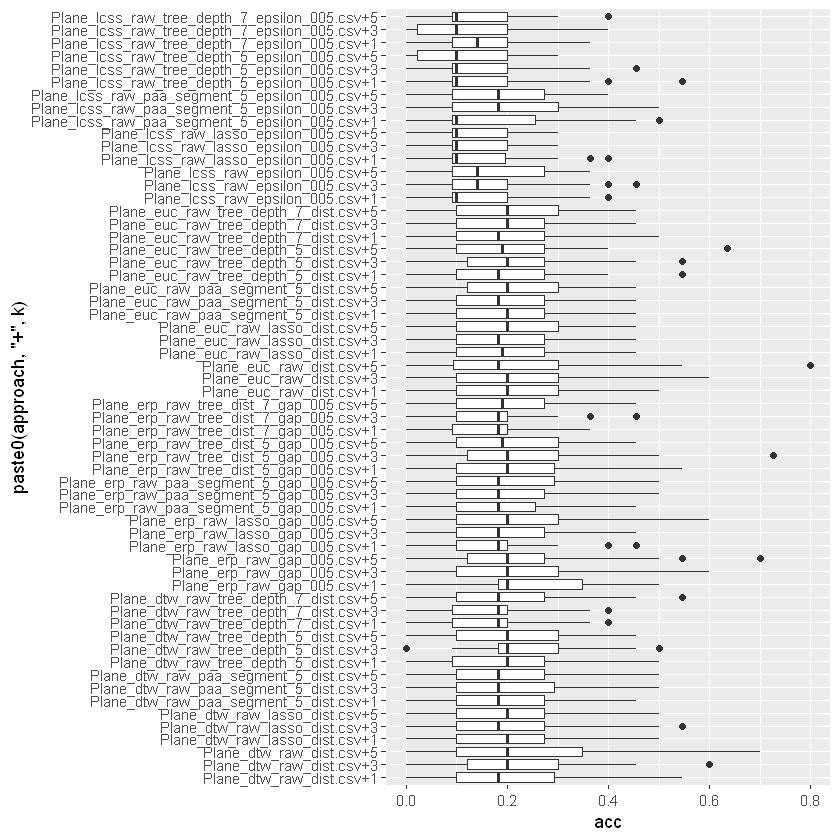

In [39]:
require(overall_resultsplot2)
ggplot(overall_results,aes(x=paste0(approach,'+',k), y=acc)) +
geom_boxplot()+
coord_flip()